In [55]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from itertools import islice
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

In [56]:
data1 = pd.read_csv('fb_data.txt', error_bad_lines=False, sep='\t')
data1.columns

Index(['Text'], dtype='object')

In [57]:
data1.head()

,Text
0,Drug Runners and a U.S. Senator have somethin...
1,"Heres a single, to add, to Kindle. Just read t..."
2,If you tire of Non-Fiction.. Check out http://...
3,Ghost of Round Island is supposedly nonfiction.
4,Why is Barnes and Nobles version of the Kindle...


In [58]:
data2 = pd.read_csv('fb_label.txt', error_bad_lines=False, sep='\t')
data2.columns

Index(['Type'], dtype='object')

In [59]:
data2.head()

,Type
0,O
1,O
2,O
3,O
4,N


In [60]:
#merging dataset with label
data1['sort'] = np.arange(len(data1))
data2['sort'] = np.arange(len(data2))
data= pd.merge(data1, data2, on='sort')
data.head()

,Text,sort,Type
0,Drug Runners and a U.S. Senator have somethin...,0,O
1,"Heres a single, to add, to Kindle. Just read t...",1,O
2,If you tire of Non-Fiction.. Check out http://...,2,O
3,Ghost of Round Island is supposedly nonfiction.,3,O
4,Why is Barnes and Nobles version of the Kindle...,4,N


In [61]:
data.head()

,Text,sort,Type
0,Drug Runners and a U.S. Senator have somethin...,0,O
1,"Heres a single, to add, to Kindle. Just read t...",1,O
2,If you tire of Non-Fiction.. Check out http://...,2,O
3,Ghost of Round Island is supposedly nonfiction.,3,O
4,Why is Barnes and Nobles version of the Kindle...,4,N


In [62]:
data=data.drop(['sort'], axis=1)
data.head()

,Text,Type
0,Drug Runners and a U.S. Senator have somethin...,O
1,"Heres a single, to add, to Kindle. Just read t...",O
2,If you tire of Non-Fiction.. Check out http://...,O
3,Ghost of Round Island is supposedly nonfiction.,O
4,Why is Barnes and Nobles version of the Kindle...,N


In [63]:
data['Type'].value_counts()

P    641
O    280
N     79
Name: Type, dtype: int64

In [64]:
Type = {'P': 1,'O': 0, 'N' : 0}
data.Type = [Type[item] for item in data.Type]

In [65]:
data.head(7)

,Text,Type
0,Drug Runners and a U.S. Senator have somethin...,0
1,"Heres a single, to add, to Kindle. Just read t...",0
2,If you tire of Non-Fiction.. Check out http://...,0
3,Ghost of Round Island is supposedly nonfiction.,0
4,Why is Barnes and Nobles version of the Kindle...,0
5,"@Maria: Do you mean the Nook? Be careful, bo...",1
6,kindle is awesome! mines great,1


In [109]:
data['Type'].value_counts()

1    641
0    359
Name: Type, dtype: int64

In [110]:
data['Type'].value_counts(normalize=True)

1    0.641
0    0.359
Name: Type, dtype: float64

In [111]:
data.describe()

,Type
count,1000.000000
mean,0.641000
std,0.479947
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [112]:
#Spliting the training data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(data["Text"], data["Type"], test_size=0.2)

In [113]:
print("Training Data: {}, Validation: {}".format(len(X_train), len(X_valid)))

Training Data: 800, Validation: 200


In [114]:
#vectorizing data
data_v = CountVectorizer(max_features=5000, binary=True, stop_words="english")

In [115]:
data_v.fit(X_train)
X_train_v = data_v.transform(X_train)
X_valid_v = data_v.transform(X_valid)

In [117]:
list(islice(data_v.vocabulary_.items(), 20))

[('think', 2069),
 ('interesting', 1063),
 ('assume', 148),
 ('people', 1516),
 ('developing', 538),
 ('countries', 449),
 ('read', 1678),
 ('did', 549),
 ('post', 1582),
 ('kids', 1133),
 ('excited', 697),
 ('reading', 1681),
 ('kindle', 1140),
 ('playing', 1562),
 ('took', 2110),
 ('potential', 1587),
 ('renew', 1723),
 ('reader', 1679),
 ('create', 459),
 ('excitement', 698)]

In [72]:
#logistic regression
model= LogisticRegression(C=0.3)
model.fit(X_train_v, y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
print("Training Acc: {:.4f}".format(model.score(X_train_v, y_train)))
print("Validation Acc: {:.4f}".format(model.score(X_valid_v, y_valid)))

Training Acc: 0.9663
Validation Acc: 0.8500


In [74]:
data_test=pd.read_csv("test.csv")
data_test.head()

,Id,Tweet,following,followers,actions,is_retweet,location
0,8536,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,UP THRU DERE!
1,5214,I only learned to dream in sound #love,63.0,55,508.0,0,"Johannesburg, South Africa"
2,7437,Cause I ain't trying to out here thinking you ...,0.0,0,0.0,0,NaN
3,10009,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,"Shreveport, LA"
4,4672,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,EVERYWHERE


In [75]:
ytest = np.array(y_valid)# confusion matrix and classification report(precision, recall, F1-score)

In [76]:
print(classification_report(ytest, model.predict(X_valid_v)))
print(confusion_matrix(ytest, model.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        76
           1       0.86      0.90      0.88       124

   micro avg       0.85      0.85      0.85       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.85      0.85      0.85       200

[[ 58  18]
 [ 12 112]]


In [77]:
predictions_NN_prob = model.predict(X_valid_v)

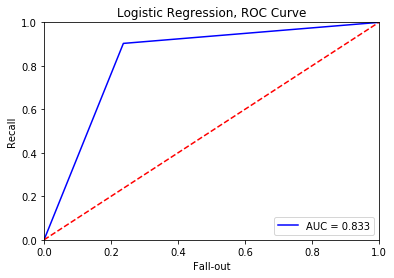

In [78]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob)
roc_auc1 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Logistic Regression, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()


In [79]:
#Gradient Boosted Trees
model_gb = RandomForestClassifier(min_samples_leaf=3, n_estimators=25, n_jobs=-1)
model_gb.fit(X_train_v, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
print("Training Accuracy: {:.3f}".format(model_gb.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(model_gb.score(X_valid_v, y_valid)))

Training Accuracy: 0.794
Validation Accuracy: 0.710


In [81]:
print(classification_report(ytest, model_gb.predict(X_valid_v)))
print(confusion_matrix(ytest, model_gb.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.88      0.28      0.42        76
           1       0.69      0.98      0.81       124

   micro avg       0.71      0.71      0.71       200
   macro avg       0.78      0.63      0.61       200
weighted avg       0.76      0.71      0.66       200

[[ 21  55]
 [  3 121]]


In [82]:
predictions_NN_prob1 = model_gb.predict(X_valid_v)

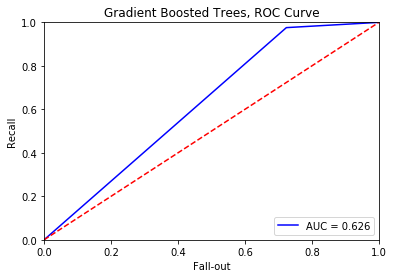

In [83]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob1)
roc_auc2 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Gradient Boosted Trees, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [84]:
#Random Forest
model_rm = RandomForestClassifier(min_samples_leaf=3, n_estimators=25, n_jobs=-1)
model_rm.fit(X_train_v, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
# Training Accuracy
print("Training Accuracy: {:.3f}".format(model_rm.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(model_rm.score(X_valid_v, y_valid)))

Training Accuracy: 0.775
Validation Accuracy: 0.685


In [86]:
print(classification_report(ytest, model_rm.predict(X_valid_v)))
print(confusion_matrix(ytest, model_rm.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.93      0.18      0.31        76
           1       0.66      0.99      0.80       124

   micro avg       0.69      0.69      0.69       200
   macro avg       0.80      0.59      0.55       200
weighted avg       0.77      0.69      0.61       200

[[ 14  62]
 [  1 123]]


In [87]:
predictions_NN_prob2 = model_rm.predict(X_valid_v)

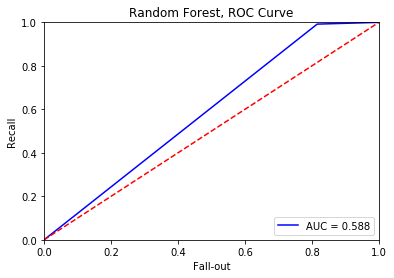

In [88]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob2)
roc_auc3 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Random Forest, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [89]:
#support vector machine
scaler = MaxAbsScaler()

In [90]:
X_train_scaled = scaler.fit_transform(X_train_v)
X_valid_scaled = scaler.fit_transform(X_valid_v)

In [91]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on validation set: {:.3f}".format(svc.score(X_valid_scaled, y_valid)))

Accuracy on training set: 0.994
Accuracy on validation set: 0.830


C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [92]:
print(classification_report(ytest, svc.predict(X_valid_v)))
print(confusion_matrix(ytest, svc.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        76
           1       0.86      0.87      0.86       124

   micro avg       0.83      0.83      0.83       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.83      0.83       200

[[ 58  18]
 [ 16 108]]


In [93]:
predictions_NN_prob3 = svc.predict(X_valid_v)

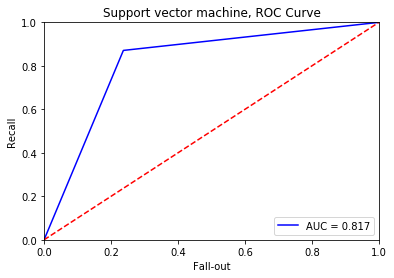

In [94]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob3)
roc_auc4 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Support vector machine, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc4)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [95]:
#k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_v, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train_v, y_train)))
print('Accuracy of K-NN classifier on validation set: {:.2f}'.format(knn.score(X_valid_v, y_valid)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on validation set: 0.75


In [96]:
print(classification_report(ytest, knn.predict(X_valid_v)))
print(confusion_matrix(ytest, knn.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.63      0.84      0.72        76
           1       0.88      0.69      0.77       124

   micro avg       0.75      0.75      0.75       200
   macro avg       0.75      0.77      0.75       200
weighted avg       0.78      0.75      0.75       200

[[64 12]
 [38 86]]


In [97]:
predictions_NN_prob4 = knn.predict(X_valid_v)

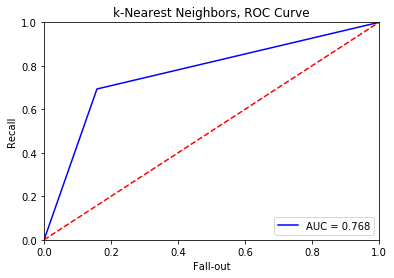

In [98]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob4)
roc_auc5 = auc(false_positive_rate, recall)
plt.figure()
plt.title('k-Nearest Neighbors, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc5)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [99]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

print('')
#k-Nearest Neighbors
printmd("**k-Nearest Neighbors**")
print('Training Acc: {:.2f}'.format(knn.score(X_train_v, y_train)))
print('Validation Acc: {:.2f}'.format(knn.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc5))
print('')
print(classification_report(ytest, knn.predict(X_valid_v)))


print('')
#Logistic Regression
printmd("**Logistic Regression**")
print("Training Acc: {:.4f}".format(model.score(X_train_v, y_train)))
print("Validation Acc: {:.4f}".format(model.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc1))
print('')
print(classification_report(ytest, model.predict(X_valid_v)))


print('')
#Random Forest
printmd("**Random Forest**")
print("Training Acc: {:.3f}".format(model_rm.score(X_train_v, y_train)))
print("Validation Acc: {:.3f}".format(model_rm.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc3))
print('')
print(classification_report(ytest, model_rm.predict(X_valid_v)))

print('')
#Gradient Boosting
printmd("**Gradient Boosting**")
print("Training Acc: {:.3f}".format(model_gb.score(X_train_v, y_train)))
print("Validation Acc: {:.3f}".format(model_gb.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc2))
print('')
print(classification_report(ytest, model_gb.predict(X_valid_v)))

print('')
#Support Vector Machine
printmd("**Support Vector Machine**")
print("Training Acc: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Validation Acc: {:.3f}".format(svc.score(X_valid_scaled, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc4))
print('')
print(classification_report(ytest, svc.predict(X_valid_v)))

**k-Nearest Neighbors**

Training Acc: 0.86
Validation Acc: 0.75
AUC Value: 0.768

              precision    recall  f1-score   support

           0       0.63      0.84      0.72        76
           1       0.88      0.69      0.77       124

   micro avg       0.75      0.75      0.75       200
   macro avg       0.75      0.77      0.75       200
weighted avg       0.78      0.75      0.75       200




**Logistic Regression**

Training Acc: 0.9663
Validation Acc: 0.8500
AUC Value: 0.833

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        76
           1       0.86      0.90      0.88       124

   micro avg       0.85      0.85      0.85       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.85      0.85      0.85       200




**Random Forest**

Training Acc: 0.775
Validation Acc: 0.685
AUC Value: 0.588

              precision    recall  f1-score   support

           0       0.93      0.18      0.31        76
           1       0.66      0.99      0.80       124

   micro avg       0.69      0.69      0.69       200
   macro avg       0.80      0.59      0.55       200
weighted avg       0.77      0.69      0.61       200




**Gradient Boosting**

Training Acc: 0.794
Validation Acc: 0.710
AUC Value: 0.626

              precision    recall  f1-score   support

           0       0.88      0.28      0.42        76
           1       0.69      0.98      0.81       124

   micro avg       0.71      0.71      0.71       200
   macro avg       0.78      0.63      0.61       200
weighted avg       0.76      0.71      0.66       200




**Support Vector Machine**

Training Acc: 0.994
Validation Acc: 0.830
AUC Value: 0.817

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        76
           1       0.86      0.87      0.86       124

   micro avg       0.83      0.83      0.83       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.83      0.83       200

